# Project 3 - Web APIs and NLP Classification

## Part 2: Data Cleaning and EDA

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from string import punctuation
import re

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#viewing options
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
pd.set_option('max_colwidth', 200)

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/soz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/soz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Import data

In [3]:
#read data from EtherMining & CryptoCurrency reddit
df_em = pd.read_csv("./data/EtherMining.csv")
df_cc = pd.read_csv("./data/CryptoCurrency.csv")

/Users/soz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/soz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_em = df_em.iloc[:1999]

In [5]:
df_cc = df_cc.iloc[:1999]

In [6]:
df_em.shape

(1999, 84)

In [7]:
df_cc.shape

(1999, 83)

In [8]:
df_combined = pd.concat([df_em,df_cc],axis = 0, ignore_index = True)

In [9]:
df_combined.shape

(3998, 87)

In [10]:
df_combined.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,media_metadata,removed_by_category,gallery_data,is_gallery,author_flair_background_color,author_flair_template_id,author_flair_text_color,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,poll_data,author_cakeday,edited,banned_by,suggested_sort,live_audio,distinguished
0,[],False,khad3,NaN,[],NaN,text,t2_gr5de,False,False,False,[],False,False,1658750255,self.EtherMining,https://www.reddit.com/r/EtherMining/comments/w7n1tq/question_what_is_ether_miners_plan_postmerge/,{},w7n1tq,False,True,False,False,False,True,True,False,#46d160,question,"[{'e': 'text', 't': 'General Question'}]",3123ceb4-87ea-11eb-8dfe-0eb98e466e9f,General Question,dark,richtext,False,False,True,0,0,False,all_ads,/r/EtherMining/comments/w7n1tq/question_what_is_ether_miners_plan_postmerge/,False,6,1658750265,1,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",True,False,False,EtherMining,t5_32rww,197898,public,self,Question: What is ether miners plan post-merge?,0,[],1.0,https://www.reddit.com/r/EtherMining/comments/w7n1tq/question_what_is_ether_miners_plan_postmerge/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Elven11290,NaN,[],NaN,text,t2_g8fv8vo9,False,False,False,[],False,False,1658746415,i.redd.it,https://www.reddit.com/r/EtherMining/comments/w7ltks/wtsipollo_v1mini_300mh240watt_for_eth_brand_new/,{},w7ltks,False,True,False,False,True,True,False,False,#bada55,showandtell,"[{'e': 'text', 't': 'Show and Tell'}]",4a9bfda8-87ea-11eb-93b6-0e5ba92ae053,Show and Tell,dark,richtext,False,False,True,0,0,False,all_ads,/r/EtherMining/comments/w7ltks/wtsipollo_v1mini_300mh240watt_for_eth_brand_new/,False,6,1658746426,1,NaN,True,False,False,EtherMining,t5_32rww,197898,public,image,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,0,[],1.0,https://i.redd.it/jl46xe273pd91.jpg,all_ads,6,image,"{'enabled': True, 'images': [{'id': 'EtTzw3ObyIpzwQxTnL_2O-UrZ6VtK8VJR5DVsA-KHCM', 'resolutions': [{'height': 78, 'url': 'https://preview.redd.it/jl46xe273pd91.jpg?width=108&amp;crop=smart&amp;aut...",101.0,140.0,https://i.redd.it/jl46xe273pd91.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Otherwise_Specific26,NaN,[],NaN,text,t2_h9lxy9cf,False,False,False,[],False,False,1658733039,i.redd.it,https://www.reddit.com/r/EtherMining/comments/w7i61n/i_dont_know_why_miner_getting_offline/,{},w7i61n,False,True,False,False,True,True,False,False,NaN,linux,"[{'e': 'text', 't': 'OS - Linux'}]",f76dcf98-52bf-11e7-ba24-0ed0cf2103f0,OS - Linux,dark,richtext,False,False,True,0,0,False,all_ads,/r/EtherMining/comments/w7i61n/i_dont_know_why_miner_getting_offline/,False,6,1658733049,1,NaN,True,False,False,EtherMining,t5_32rww,197896,public,image,"I dont know why miner getting offline automatically, why this gape in hivos graph",0,[],1.0,https://i.redd.it/55jxzv0cznd91.png,all_ads,6,ima

# Exploration of missing values

In [11]:
# identify number of rows with null values for each feature
df_combined.isnull().sum()[df_combined.isnull().sum()>0].sort_values(ascending=False)

distinguished                    3998
live_audio                       3998
edited                           3998
banned_by                        3996
author_cakeday                   3981
poll_data                        3968
author_flair_background_color    3920
author_flair_template_id         3900
gallery_data                     3896
is_gallery                       3888
crosspost_parent_list            3876
crosspost_parent                 3876
media                            3823
secure_media_embed               3823
secure_media                     3823
media_embed                      3823
media_metadata                   3714
author_flair_css_class           3346
suggested_sort                   3259
author_flair_text                2929
author_flair_text_color          2908
removed_by_category              2856
url_overridden_by_dest           2337
preview                          2321
post_hint                        2321
thumbnail_width                  2246
thumbnail_he

noted lost of additional columns from the data that we have scrapped. For the purpose of this project, we will only be using the following columns. "subreddit, title & selftext" as we are intending to predict what subreddit a given post came from.

In [12]:
#proceed to delete excess columns
df_combined = df_combined[['title', 'selftext', 'subreddit']]

In [13]:
df_combined.head(50)

,title,selftext,subreddit
0,Question: What is ether miners plan post-merge?,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",EtherMining
1,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,NaN,EtherMining
2,"I dont know why miner getting offline automatically, why this gape in hivos graph",NaN,EtherMining
3,Miner getting offline,"I dont know why miner getting offline automatically, why this gape in hivos graph",EtherMining
4,nicehash wallet with hiveos,"Hey all, I understand I can use nicehash pool, servers etc when using hiveos by selecting nicehash coins, and pools. Can you mine any coin in hiveos and set it to your nicehash wallet for auto con...",EtherMining
5,"Dag just crossed 5Gb, now my rtx 2060 says cuda out of memory","Hmm Using trex, getting cuda out of memory errors..on 2060 rtx\nI see Dag says 64MB left...bit dag is like 5GB...\n\nWin 10..\n\nAny suggestions?",EtherMining
6,Has anyone tried a portable ac and if so how much has it helped?,"Hey guys, as it is currently summer the rigs are running toasty and im looking at ways to cool them down. Ive looked into grow tents but want to avoid them if I can and I am now looking at portab...",EtherMining
7,Find out how many blocks you've mined on Ethermine (Flypool),&amp;#x200B;\n\n[Random ETH Wallet](https://preview.redd.it/hidnh3tn9kd91.png?width=708&amp;format=png&amp;auto=webp&amp;s=85f1afc5482e7085899358cefdb1913335d1a923)\n\n# TLDR; \n\n[This](https://m...,EtherMining
8,can I mine?,"hi, so I have a RTX Gigabyte 2060 Super 8GB GPU and Ryzen 5 3600 CPU, 2TB HDD, 256GB ssd, 16gb ram.\nI know its not much, but, can I mine? Its my PC.",EtherMining
9,"Free 1-20 TRX per day, all withdrawals when you reach 100 TRX. Log in for 30 seconds every day, you can earn 100TRX for free in 1 week 5TRX can participate in the investment, 1TRX can also be with...",[removed],EtherMining


In [14]:
df_combined.isnull().sum()

title           0
selftext     1804
subreddit       0
dtype: int64

In [15]:
#Fill NA with space
df_combined = df_combined.fillna('')

In [16]:
df_combined.tail()

,title,selftext,subreddit
3993,Farsite is the best,[removed],CryptoCurrency
3994,Nox Trading Inc.,[removed],CryptoCurrency
3995,Grin giveaway to help spread the message of the Grin Advantage,,CryptoCurrency
3996,Korean Prosecutors Raid Crypto Exchanges in Terra Probe,,CryptoCurrency
3997,Minecraft bans usage of Blockchain(s) and NFTs in its Game and Server-Software,,CryptoCurrency


some of the post have their selftext details removed or deleted. Removed post are likely due to moderation or each subreddit's specific rules.

In [17]:
# Replace all '[removed]' values under 'selftext' column with empty string
df_combined['selftext'].replace('[removed]', '',inplace=True)

# Replace all '[deleted]' values under 'selftext' column with empty string
df_combined['selftext'].replace('[deleted]', '',inplace=True)

In [18]:
df_combined.tail()

,title,selftext,subreddit
3993,Farsite is the best,,CryptoCurrency
3994,Nox Trading Inc.,,CryptoCurrency
3995,Grin giveaway to help spread the message of the Grin Advantage,,CryptoCurrency
3996,Korean Prosecutors Raid Crypto Exchanges in Terra Probe,,CryptoCurrency
3997,Minecraft bans usage of Blockchain(s) and NFTs in its Game and Server-Software,,CryptoCurrency


In [19]:
df_combined.isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

In [20]:
#duplicate titles are found in some entries. lets delete these
df_combined[df_combined.duplicated(['title'], keep = False)].count()

title        389
selftext     389
subreddit    389
dtype: int64

In [21]:
df_combined.drop_duplicates(subset= ['title'], keep = 'first' , inplace = True)

In [22]:
df_combined.shape

(3750, 3)

# Data Cleaning

We need to remove unnecessary characters when cleaning text data (punctuation, symbols, etc.).

When we "tokenize" data using RegEx, we take it and split it up into distinct chunks based on some pattern.

In [23]:
# As some of the selftext is now empty due to [removed] post etc, we will combine title with selftext into an "alltext" field for purpose of our prediction
# create a new column comining title with self text for all text
df_combined['alltext'] = df_combined['title'] + ' ' + df_combined['selftext']

In [24]:
#thanks to https://www.reddit.com/r/Python/comments/kajfgq/i_compiled_20_code_snippets_to_clean_and_tokenize/

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    text = re.sub(r'https?:\/\/.*\/\w*', '', text) #remove hyperlinks
    text = re.sub(r"<a[^>]*>(.*?)</a>", r"\1", text) #remove <a> tags but keep its contents
    text = re.sub(r"<.*?>", "", text) #remove HTML tags
    text = " ".join(text.split())#Remove extra spaces, tabs, and line breaks
    text = re.sub(f"[{re.escape(punctuation)}]", "", text) #Remove punctuation

    return text

df_combined['alltext'] = df_combined['alltext'].map(preprocess_text)

In [25]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z0-9]+')

In [26]:
# Create new column with Tokens
df_combined['title_tokens'] = df_combined.apply(lambda row: tokenizer.tokenize(row['title'].lower()),axis=1)
df_combined['selftext_tokens'] = df_combined.apply(lambda row: tokenizer.tokenize(row['selftext'].lower()),axis=1)
df_combined['alltext_tokens'] = df_combined.apply(lambda row: tokenizer.tokenize(row['alltext'].lower()),axis=1)

In [27]:
df_combined.head()

,title,selftext,subreddit,alltext,title_tokens,selftext_tokens,alltext_tokens
0,Question: What is ether miners plan post-merge?,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",EtherMining,question what is ether miners plan postmerge no date is confirmed yet for the merge but im curious what miners are planning to do when that happens do they move to etc slowly scale down or just ig...,"[question, what, is, ether, miners, plan, post, merge]","[no, date, is, confirmed, yet, for, the, merge, but, i, m, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, etc, slowly, scale, down, or, just, ignore, the, m...","[question, what, is, ether, miners, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, ..."
1,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,,EtherMining,wtsipollo v1mini 300mh240watt for eth brand new stock,"[wts, ipollo, v1mini, 300mh, 240watt, for, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]"
2,"I dont know why miner getting offline automatically, why this gape in hivos graph",,EtherMining,i dont know why miner getting offline automatically why this gape in hivos graph,"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]",[],"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]"
3,Miner getting offline,"I dont know why miner getting offline automatically, why this gape in hivos graph",EtherMining,miner getting offline i dont know why miner getting offline automatically why this gape in hivos graph,"[miner, getting, offline]","[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]"
4,nicehash wallet with hiveos,"Hey all, I understand I can use nicehash pool, servers etc when using hiveos by selecting nicehash coins, and pools. Can you mine any coin in hiveos and set it to your nicehash wallet for auto con...",EtherMining,nicehash wallet with hiveos hey all i understand i can use nicehash pool servers etc when using hiveos by selecting nicehash coins and pools can you mine any coin in hiveos and set it to your nice...,"[nicehash, wallet, with, hiveos]","[hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in, hiveos, and, set, it, to, your,...","[nicehash, wallet, with, hiveos, hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in,..."


# Stop Word Removal
Stop words are common words, such as a and the, are removed to increase the performance of the classifier model. Since stop words occur in abundance, they provide little to no unique information that can be used for classification or clustering.

In [28]:
# Remove general stopwords in the english language 
stoplist = stopwords.words('english')
df_combined['cleaned_title'] = df_combined['title_tokens'].apply(lambda row: [word for word in row if word not in stoplist])
df_combined['cleaned_selftext'] = df_combined['selftext_tokens'].apply(lambda row: [word for word in row if word not in stoplist])
df_combined['cleaned_alltext'] = df_combined['alltext_tokens'].apply(lambda row: [word for word in row if word not in stoplist])

In [29]:
df_combined.head()

,title,selftext,subreddit,alltext,title_tokens,selftext_tokens,alltext_tokens,cleaned_title,cleaned_selftext,cleaned_alltext
0,Question: What is ether miners plan post-merge?,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",EtherMining,question what is ether miners plan postmerge no date is confirmed yet for the merge but im curious what miners are planning to do when that happens do they move to etc slowly scale down or just ig...,"[question, what, is, ether, miners, plan, post, merge]","[no, date, is, confirmed, yet, for, the, merge, but, i, m, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, etc, slowly, scale, down, or, just, ignore, the, m...","[question, what, is, ether, miners, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, ...","[question, ether, miners, plan, post, merge]","[date, confirmed, yet, merge, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]","[question, ether, miners, plan, postmerge, date, confirmed, yet, merge, im, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]"
1,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,,EtherMining,wtsipollo v1mini 300mh240watt for eth brand new stock,"[wts, ipollo, v1mini, 300mh, 240watt, for, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]","[wts, ipollo, v1mini, 300mh, 240watt, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, eth, brand, new, stock]"
2,"I dont know why miner getting offline automatically, why this gape in hivos graph",,EtherMining,i dont know why miner getting offline automatically why this gape in hivos graph,"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]",[],"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]",[],"[dont, know, miner, getting, offline, automatically, gape, hivos, graph]"
3,Miner getting offline,"I dont know why miner getting offline automatically, why this gape in hivos graph",EtherMining,miner getting offline i dont know why miner getting offline automatically why this gape in hivos graph,"[miner, getting, offline]","[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]","[miner, getting, offline, dont, know, miner, getting, offline, automatically, gape, hivos, graph]"
4,nicehash wallet with hiveos,"Hey all, I understand I can use nicehash pool, servers etc when using hiveos by selecting nicehash coins, and pools. Can you mine any coin in hiveos and set it to your nicehash wallet for auto con...",EtherMining,nicehash wallet with hiveos hey all i understand i can use nicehash pool servers etc when using hiveos by selecting nicehash coins and pools can you mine any coin in hiveos and set it to your nice...,"[nicehash, wallet, with, hiveos]","[hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in, hiveos, and, set, it, to, your,...","[nicehash, wallet, with, hiveos, hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in,...","[nicehash, wallet, hiveos]","[hey, understand, use, nicehash, pool, servers, etc, using, hiveos, selecting, nicehash, coins, pools, mine, coin, hiveos, set

note that the stop words such as 'no', 'is', 'for', 'the' & others have been removed from our cleaned_title & cleaned_body features

In [30]:
#getting string length of each text column for EDA
df_combined['title_length'] = df_combined['title'].str.len()
df_combined['selftext_length'] = df_combined['selftext'].str.len()
df_combined['alltext_length'] = df_combined['alltext'].str.len()

In [31]:
#getting word count for each text column for EDA
df_combined['title_count'] = df_combined['title'].str.split().str.len()
df_combined['selftext_count'] = df_combined['selftext'].str.split().str.len()
df_combined['alltext_count'] = df_combined['alltext'].str.split().str.len()

In [32]:
df_combined.head()

,title,selftext,subreddit,alltext,title_tokens,selftext_tokens,alltext_tokens,cleaned_title,cleaned_selftext,cleaned_alltext,title_length,selftext_length,alltext_length,title_count,selftext_count,alltext_count
0,Question: What is ether miners plan post-merge?,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",EtherMining,question what is ether miners plan postmerge no date is confirmed yet for the merge but im curious what miners are planning to do when that happens do they move to etc slowly scale down or just ig...,"[question, what, is, ether, miners, plan, post, merge]","[no, date, is, confirmed, yet, for, the, merge, but, i, m, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, etc, slowly, scale, down, or, just, ignore, the, m...","[question, what, is, ether, miners, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, ...","[question, ether, miners, plan, post, merge]","[date, confirmed, yet, merge, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]","[question, ether, miners, plan, postmerge, date, confirmed, yet, merge, im, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]",47,181,220,7,34,41
1,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,,EtherMining,wtsipollo v1mini 300mh240watt for eth brand new stock,"[wts, ipollo, v1mini, 300mh, 240watt, for, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]","[wts, ipollo, v1mini, 300mh, 240watt, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, eth, brand, new, stock]",55,0,53,8,0,8
2,"I dont know why miner getting offline automatically, why this gape in hivos graph",,EtherMining,i dont know why miner getting offline automatically why this gape in hivos graph,"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]",[],"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]",[],"[dont, know, miner, getting, offline, automatically, gape, hivos, graph]",81,0,80,14,0,14
3,Miner getting offline,"I dont know why miner getting offline automatically, why this gape in hivos graph",EtherMining,miner getting offline i dont know why miner getting offline automatically why this gape in hivos graph,"[miner, getting, offline]","[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]","[miner, getting, offline, dont, know, miner, getting, offline, automatically, gape, hivos, graph]",21,81,102,3,14,17
4,nicehash wallet with hiveos,"Hey all, I understand I can use nicehash pool, servers etc when using hiveos by selecting nicehash coins, and pools. Can you mine any coin in hiveos and set it to your nicehash wallet for auto con...",EtherMining,nicehash wallet with hiveos hey all i understand i can use nicehash pool servers etc when using hiveos by selecting nicehash coins and pools can you mine any coin in hiveos and set it to your nice...,"[nicehash, wallet, with, hiveos]","[hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in, hiveos, and, set, it, to, your,...","[nicehash, wallet, with, hiveos, hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you, mine, any, coin, in,...","[ni

In [33]:
#lets take a look at the longest titles (original)
df_combined.sort_values(by=['title_count'], ascending=False)[['subreddit','title','title_count']].head(5)

,subreddit,title,title_count
1216,EtherMining,"** tried hiveon same issue **now on windows Having same issue now. Was using riserless system as soon as i was put 2 risers ans 1 more gpu it lost its stability, 48 hours now, no luck . My miner k...",62
778,EtherMining,"The current 10 PoW coins by market cap out of 342, and the 10 PoS coins by market cap out of 274. Etherium Classic (ETC) will remain PoW. Etherium will join the club of PoS to be on the top post. ...",59
1764,EtherMining,"available in- STOCK 12 Jan - Official Distry of MSI, ZOTAC, BIOSTAR, PowerColor ect. AMD Powercolor AMD Radeon 6800xt Red Devil OC - 16 Gb - 20 pcs - 1400 usd 64 Mhash Powercolor AMD Radeon 6600xt...",59
3420,CryptoCurrency,Fruit Tycoon gotta be a good choice if you are into world of play to earn. First of all my purpose was to play the game just to earn but eventually found it being a good time killer. The gameplay ...,59
1598,EtherMining,GPU memory temps.?.? I changed my thermal pads on my Asus tuf 3080 and dropped massively! It went from 98’c to 80’-82’c. I got a thermal pad kit for my Gigabyte 3080 but since it’s lhr the temps m...,59


In [34]:
#likewise lets look at the shortest titles (original)
df_combined.sort_values(by=['title_count'], ascending=True)[['subreddit','title','title_count']].head(5)

,subreddit,title,title_count
843,EtherMining,HODL,1
2482,CryptoCurrency,tipmeacoffe,1
3638,CryptoCurrency,https://www.calidummtoken.com/,1
1081,EtherMining,:(,1
2657,CryptoCurrency,Motivation,1


In [35]:
#likewise lets look at the shortest titles (original)
df_combined.sort_values(by=['title_length'], ascending=True)[['subreddit','title','title_length']].head(10)

,subreddit,title,title_length
3220,CryptoCurrency,🤣,1
841,EtherMining,RN,2
1081,EtherMining,:(,2
1088,EtherMining,Hmm,3
2570,CryptoCurrency,CRO,3
1036,EtherMining,Lol,3
1576,EtherMining,KW/H,4
1093,EtherMining,Help,4
2349,CryptoCurrency,Meme,4
3383,CryptoCurrency,Come,4


# EDA

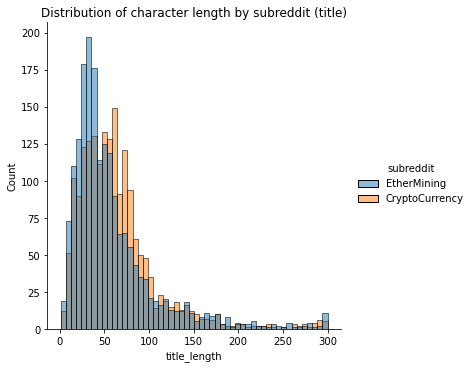

In [36]:
# Distribution of word length by subreddit
sns.displot(df_combined, x = 'title_length', hue='subreddit').set(title='Distribution of character length by subreddit (title)');


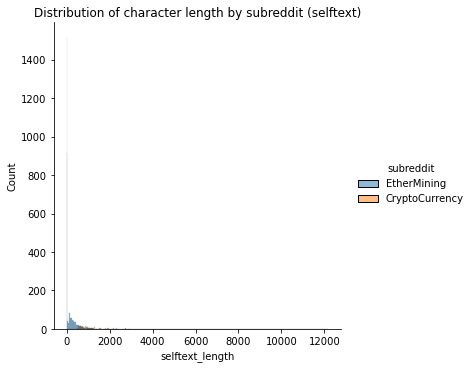

In [37]:
sns.displot(df_combined, x = 'selftext_length', hue='subreddit').set(title='Distribution of character length by subreddit (selftext)');


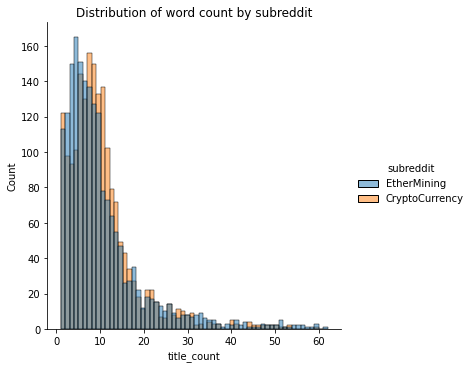

In [38]:
# Distribution of Word count by subreddit
sns.displot(df_combined, x = 'title_count', hue='subreddit').set(title='Distribution of word count by subreddit');

From the above, we seem to note that the word count for title is rather similar for both subreddits. Looking at character counts however, there seems to be a max character length of 300 per subreddit. Upon further checking on the internet, it seems to be true that titles are limited to 300 characters.

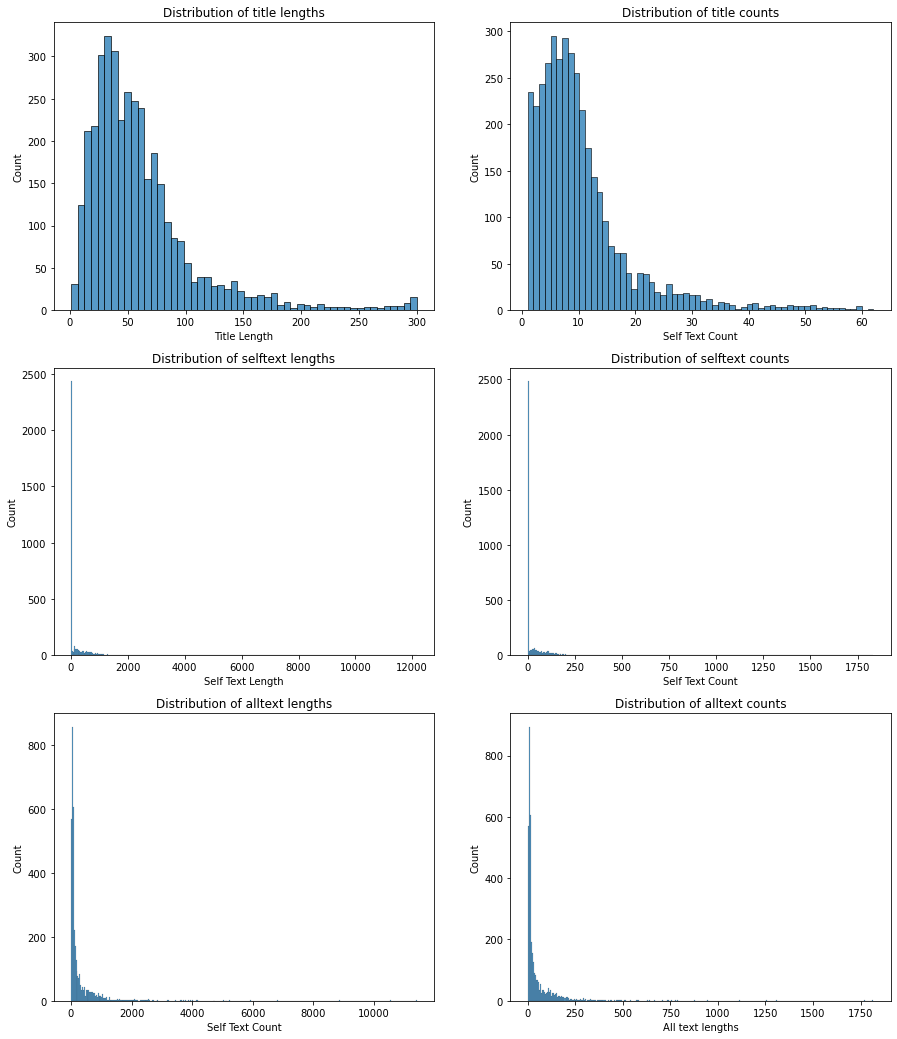

In [39]:
fig, axes = plt.subplots(3,2, figsize = (15,18))

sns.histplot(df_combined['title_length'], ax = axes[0,0])
axes[0,0].set_title('Distribution of title lengths')
axes[0,0].set_xlabel("Title Length")

sns.histplot(df_combined['title_count'], ax = axes[0,1])
axes[0,1].set_title('Distribution of title counts')
axes[0,1].set_xlabel("Self Text Count")

sns.histplot(df_combined['selftext_length'], ax = axes[1,0])
axes[1,0].set_title('Distribution of selftext lengths')
axes[1,0].set_xlabel("Self Text Length")

sns.histplot(df_combined['selftext_count'], ax = axes[1,1])
axes[1,1].set_title('Distribution of selftext counts')
axes[1,1].set_xlabel("Self Text Count");

sns.histplot(df_combined['alltext_length'], ax = axes[2,0])
axes[2,0].set_title('Distribution of alltext lengths')
axes[2,0].set_xlabel("Self Text Count");

sns.histplot(df_combined['alltext_count'], ax = axes[2,1])
axes[2,1].set_title('Distribution of alltext counts')
axes[2,1].set_xlabel("All text lengths");

In [40]:
# Comparing length of title & body (by word count) for each subreddit
df_combined.groupby(['subreddit'])[['title_count','selftext_count']].mean()

,title_count,selftext_count
subreddit,,
CryptoCurrency,10.697067,40.769600
EtherMining,10.766933,38.364267


From the above, we note that the subreddit's are rather balanced. On average, title & selftext counts are relatively even with EtherMining subreddit having a slightly lower selftext count.

In [41]:
df_combined.groupby(['subreddit'])[['alltext_count']].mean()

,alltext_count
subreddit,
CryptoCurrency,51.010667
EtherMining,48.525867


In [42]:
#distribution of post
df_combined['alltext_count'].describe()

count    3750.000000
mean       49.768267
std        98.329097
min         0.000000
25%         8.000000
50%        14.000000
75%        50.000000
max      1817.000000
Name: alltext_count, dtype: float64

From the above, we can note that most of the post (title and selftext) contents are on average about 50 words long. Median stands at around 14 word counts but we note that the max also contains almost a 128x fold more than the median. We should will be expecting a skewed distribution based on the results above.


Although the distributions seem to be highly skewed by some outliers with very long lengths and high word counts, I will not attempt to remove any of these outliers for the following reasons:

* User may have different preferences to either utilize both the 'title' and 'selftext' columns, or to input everything under the 'title' column. To have a more reliable dataset, rows with much higher lengths and word counts will be kept for complete inputs by the users.

* Having outliers in terms of length and word counts will probably not affect the model accuracy adversely.

### EDA on Tokenized Words


In [43]:
#lets lemmatize or stem the words to the base form so that we can perform some further EDA.
# As we have combined title and selftext together, we will only perform EDA on selftext
lemmatizer = WordNetLemmatizer()

In [44]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 0 to 3997
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3750 non-null   object
 1   selftext          3750 non-null   object
 2   subreddit         3750 non-null   object
 3   alltext           3750 non-null   object
 4   title_tokens      3750 non-null   object
 5   selftext_tokens   3750 non-null   object
 6   alltext_tokens    3750 non-null   object
 7   cleaned_title     3750 non-null   object
 8   cleaned_selftext  3750 non-null   object
 9   cleaned_alltext   3750 non-null   object
 10  title_length      3750 non-null   int64 
 11  selftext_length   3750 non-null   int64 
 12  alltext_length    3750 non-null   int64 
 13  title_count       3750 non-null   int64 
 14  selftext_count    3750 non-null   int64 
 15  alltext_count     3750 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 627.1+ KB


In [45]:
def lemmatize_text(row):
    return [lemmatizer.lemmatize(w) for w in row]

df_combined['alltext_lem'] = df_combined['alltext_tokens'].apply(lemmatize_text)

In [46]:
df_combined['alltext_lem'].head()

0    [question, what, is, ether, miner, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miner, are, planning, to, do, when, that, happens, do, they, move, to, et...
1                                                                                                                                             [wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]
2                                                                                                            [i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]
3                                                                                   [miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]
4    [nicehash, wallet, with, hiveos, hey, all, i, understand, i, can, use, nicehash, pool, server, etc, when, using, hiveos, by, selecting, nicehash, coin, and, pool, can, you, mi

In [47]:
# Example of lemmatized words in row one of the dataframe
for text in range(len(df_combined['alltext_tokens'][0:10])):
    if df_combined['alltext_tokens'][0][text] != df_combined['alltext_lem'][0][text]:
        print(df_combined['alltext_tokens'][0][text],df_combined['alltext_lem'][0][text])

miners miner


In [48]:
df_combined.head()

,title,selftext,subreddit,alltext,title_tokens,selftext_tokens,alltext_tokens,cleaned_title,cleaned_selftext,cleaned_alltext,title_length,selftext_length,alltext_length,title_count,selftext_count,alltext_count,alltext_lem
0,Question: What is ether miners plan post-merge?,"No date is confirmed yet for the merge, but I'm curious what miners are planning to do when that happens. Do they move to ETC, slowly scale down, or just ignore the move altogether?",EtherMining,question what is ether miners plan postmerge no date is confirmed yet for the merge but im curious what miners are planning to do when that happens do they move to etc slowly scale down or just ig...,"[question, what, is, ether, miners, plan, post, merge]","[no, date, is, confirmed, yet, for, the, merge, but, i, m, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, etc, slowly, scale, down, or, just, ignore, the, m...","[question, what, is, ether, miners, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, ...","[question, ether, miners, plan, post, merge]","[date, confirmed, yet, merge, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]","[question, ether, miners, plan, postmerge, date, confirmed, yet, merge, im, curious, miners, planning, happens, move, etc, slowly, scale, ignore, move, altogether]",47,181,220,7,34,41,"[question, what, is, ether, miner, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miner, are, planning, to, do, when, that, happens, do, they, move, to, et..."
1,WTS:Ipollo V1mini 300Mh/240watt for ETH brand new stock,,EtherMining,wtsipollo v1mini 300mh240watt for eth brand new stock,"[wts, ipollo, v1mini, 300mh, 240watt, for, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]","[wts, ipollo, v1mini, 300mh, 240watt, eth, brand, new, stock]",[],"[wtsipollo, v1mini, 300mh240watt, eth, brand, new, stock]",55,0,53,8,0,8,"[wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]"
2,"I dont know why miner getting offline automatically, why this gape in hivos graph",,EtherMining,i dont know why miner getting offline automatically why this gape in hivos graph,"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]",[],"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]",[],"[dont, know, miner, getting, offline, automatically, gape, hivos, graph]",81,0,80,14,0,14,"[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]"
3,Miner getting offline,"I dont know why miner getting offline automatically, why this gape in hivos graph",EtherMining,miner getting offline i dont know why miner getting offline automatically why this gape in hivos graph,"[miner, getting, offline]","[i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]","[miner, getting, offline]","[dont, know, miner, getting, offline, automatically, gape, hivos, graph]","[miner, getting, offline, dont, know, miner, getting, offline, automatically, gape, hivos, graph]",21,81,102,3,14,17,"[miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]"
4,nicehash wallet with hiveos,"Hey all, I understand I can use nicehash pool, servers etc when using hiveos by selecting nicehash coins, and pools. Can you mine any coin in hiveos and set it to your nicehash wallet for auto con...",EtherMining,nicehash wallet with hiveos hey all i understand i can use nicehash pool servers etc when using hiveos by selecting nicehash coins and pools ca

In [49]:
#let's do a comparison with stemming (more aggressive) using porterstemmer
# Instantiate PorterStemmer.
p_stemmer = PorterStemmer()

In [50]:
# Stem tokens.
def stem_text(row):
    return [p_stemmer.stem(w) for w in row] 

df_combined['alltext_pstem'] = df_combined['alltext_tokens'].apply(stem_text)

In [51]:
# Example of stemmed words in one row of drinks
for num in range(len(df_combined['alltext_tokens'][0])):
    if df_combined['alltext_tokens'][0][num] != df_combined['alltext_pstem'][0][num]:
        print(df_combined['alltext_tokens'][0][num],df_combined['alltext_pstem'][0][num])

miners miner
postmerge postmerg
confirmed confirm
merge merg
curious curiou
miners miner
planning plan
happens happen
slowly slowli
ignore ignor
altogether altogeth


From the above comparison, porter stemming is stricter than lemmatizing. Sort of like ridge vs lasso or L1 L2 penanlty. From the example above, planning was stemmed to 'plan' but was not lemmatized in the above example. In such situations, stemming might help to consolidate the data better for the classifier model, but this is uncertain for now. (trial and error)

### Exploring CountVec & N-gram range

In [52]:
df_combined['alltext_tokens'].head()

0    [question, what, is, ether, miners, plan, postmerge, no, date, is, confirmed, yet, for, the, merge, but, im, curious, what, miners, are, planning, to, do, when, that, happens, do, they, move, to, ...
1                                                                                                                                             [wtsipollo, v1mini, 300mh240watt, for, eth, brand, new, stock]
2                                                                                                            [i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]
3                                                                                   [miner, getting, offline, i, dont, know, why, miner, getting, offline, automatically, why, this, gape, in, hivos, graph]
4    [nicehash, wallet, with, hiveos, hey, all, i, understand, i, can, use, nicehash, pool, servers, etc, when, using, hiveos, by, selecting, nicehash, coins, and, pools, can, you,

In [53]:
alltext_tokens = df_combined['alltext_tokens'].apply(lambda row: ' '.join(row))

In [54]:
# stop words in list
add_stop = ['crypto', 'mining', 'cryptocurrency', 'ethermining', 'ampx200b']
stoplist = stopwords.words('english') + add_stop

# instantiate
cvec = CountVectorizer(stop_words = stoplist, ngram_range=(1,2))

# matrix of ngrams
ngrams = cvec.fit_transform(alltext_tokens)

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = cvec.vocabulary_

df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'ngram'})

In [55]:
df_ngram.head()

,frequency,ngram
0,606,eth
1,481,like
2,466,get
3,463,gpu
4,447,one


In [56]:
# finding unigrams 
# analysis on cleaned sentences, not original text
cvec_1 = CountVectorizer(stop_words = stoplist)

# matrix of ngrams
unigrams = cvec_1.fit_transform(alltext_tokens)

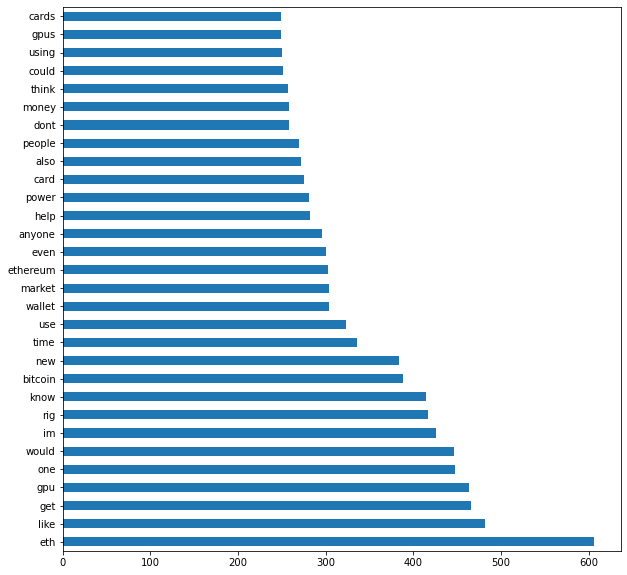

In [57]:
df_unigrams = pd.DataFrame(unigrams.todense(), columns=cvec_1.get_feature_names())

# plot top occuring words
df_unigrams.sum().sort_values(ascending=False).head(30).plot(kind='barh',figsize=(10,10));

In [58]:
# 30 most common words (in general)
df_unigrams.sum().sort_values(ascending=False).head()

eth     606
like    481
get     466
gpu     463
one     447
dtype: int64

The above list are the most common words found in the posts. A number of common words can occur > 400 times in the dataset.

In [59]:
vector_text = pd.concat([df_combined['subreddit'], df_unigrams.drop(columns=['subreddit'])], axis=1)
crpyto_words = vector_text[vector_text['subreddit'] == 'CryptoCurrency'].drop(columns=['subreddit']).sum().sort_values(ascending=False).head(30)

In [60]:
crpyto_words.index

Index(['bitcoin', 'market', 'like', 'new', 'money', 'wallet', 'would', 'one',
       'get', 'people', 'know', 'use', 'even', 'btc', 'time', 'make', 'price',
       'also', 'im', 'us', 'think', 'coinbase', 'eth', 'blockchain', 'could',
       'see', 'buy', 'back', 'way', 'trading'],
      dtype='object')

In [61]:
ngram_data = df_combined['alltext_tokens'].apply(lambda row: ' '.join(row))

In [62]:
stoplist = stopwords.words('english')
cvec = CountVectorizer(stop_words = stoplist, ngram_range=(2,3))
ngrams = cvec.fit_transform(ngram_data)
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec.vocabulary_

In [63]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'ngram'})

In [64]:
df_ngram.head()

,frequency,ngram
0,67,mining rig
1,62,seed phrase
2,60,bear market
3,60,anyone know
4,52,gpu mining


In [65]:
df_combined.loc[df_combined['subreddit']=='CrpytoCurrency', 'selftext']

Series([], Name: selftext, dtype: object)

In [66]:
#save to pickle
df_combined.to_pickle("./data/df_combined.pkl")

# Conclusion from EDA

From the above EDA we have noted the follwoing:
* The word count for title is rather similar for both subreddits. Looking at character counts however, there seems to be a max character length of 300 per subreddit. Upon further checking on the internet, it seems to be true that titles are limited to 300 characters.
* Most of the post (title and selftext) contents are on average about 50 words long. Median stands at around 14 word counts but we note that the max also contains almost a 128x fold more than the median. We should will be expecting a skewed distribution based on the results above.
* Although the distributions seem to be highly skewed by some outliers with very long lengths and high word counts, outliers should not be removed as users may have different preferences to either utilize both the 'title' and 'selftext' columns, or to input everything under the 'title' column. To have a more reliable dataset, rows with much higher lengths and word counts will be kept for complete inputs by the users.
* Having outliers in terms of length and word counts will probably not affect the model accuracy adversely.
* Porter stemming is stricter than lemmatizing. Sort of like ridge vs lasso or L1 L2 penanlty. Depending on the situation, either of the methods might help to consolidate the data better for the classifier model, but this is uncertain for now. We will confirm it via gridsearch
* Common words have been identified and added to our additional stop_list. There are also other common words that appear more than 400 times across the dataset.